# ***Spotify Top Song Popularity Analysis***

1. **Music Genres and Subgenres:**
  - Music encompasses various genres (e.g., country, rock) which can further be divided into subgenres (e.g., country blues, pop country). However, these divisions are nuanced and subject to interpretation.

2. **Classification in the Arts:**
  - Music can be classified as a performing art, fine art, or auditory art, highlighting its diverse forms of expression and creativity.

3. **Modes of Experience:**
  - Music can be experienced live at concerts, in dramatic works, or through recordings on various devices like radios, MP3 players, and smartphones.

4. **Socio-Cultural Significance:**
  - Music is deeply embedded in cultures, serving essential roles in religious rituals, social gatherings, rites of passage, and cultural events. It ranges from amateur karaoke sessions to community choirs.

5. **Diverse Engagement:**
  - Individuals engage with music in diverse ways, as a hobbyist, amateur performer, or professional musician. The music industry involves creators, performers, recorders, organizers, and distributors.

6. **Post-Performance Assessment:**
  - Even after a musical piece is performed, it undergoes evaluation by critics, journalists, and scholars, contributing to a continued dialogue and understanding of its artistic value and impact.

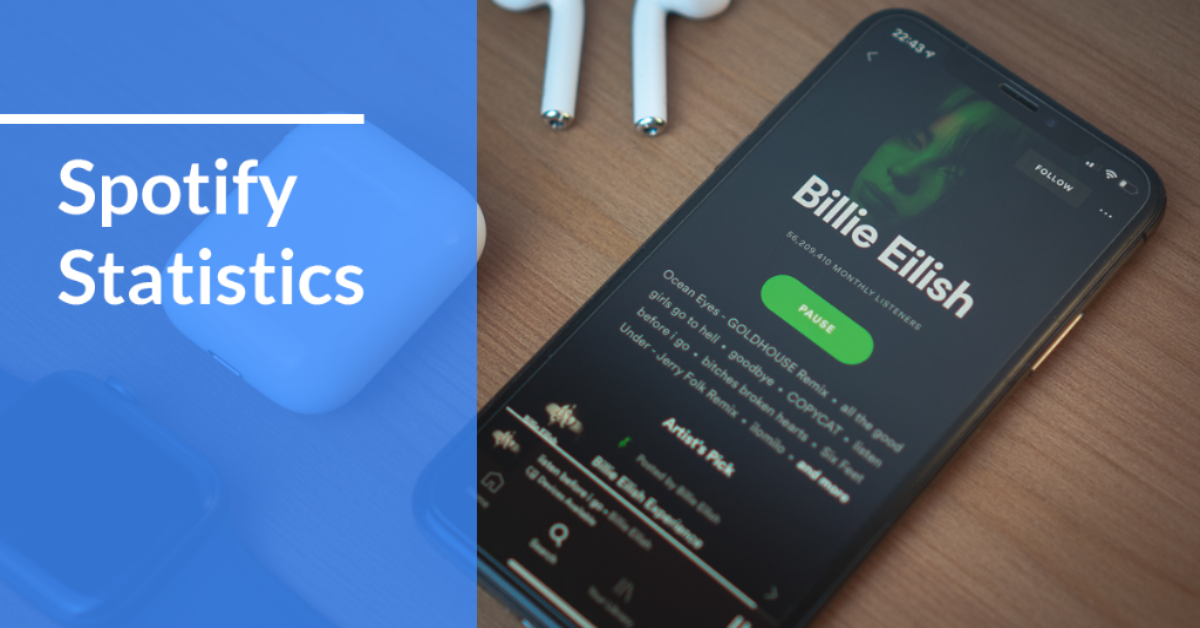

**Introduction to Spotify:**
-   Spotify Technology S.A. is a prominent international media services provider originating from Sweden, with legal domicile in Luxembourg and headquarters in Stockholm. Established in 2006, its primary business is the "Spotify" audio streaming platform.

**Platform Features:**
-  Spotify operates on a freemium model, offering basic features for free with advertisements, while additional features like offline listening and ad-free experience are available through paid subscriptions.

**Platform Details:**
-   Launched in 2008, Spotify offers access to a vast library of over 50 million tracks. Users can browse by artist, album, or genre, create, edit, and share playlists. It's accessible on various modern devices and in several regions globally.

**User Base and Subscription:**
-   As of October 2019, Spotify boasted 248 million monthly active users, including 113 million paying subscribers.

**Revenue Model and Royalties:**
-   Spotify's revenue model involves paying royalties to artists based on the number of streams as a fraction of total songs streamed. Approximately 70% of the total revenue is distributed to rights holders who, in turn, compensate the artists based on individual agreements.

**Criticism and Controversies:**
-   Spotify has faced criticism from artists and producers, including notable figures like Taylor Swift and Thom Yorke, who argue that it inadequately compensates musicians.

**Corporate and Listing Information:**
-   Spotify is listed on the New York Stock Exchange since February 2018, and it has international headquarters in Stockholm with region-specific bases. In 2018, the company relocated its New York City offices to 4 World Trade Center. [source](https://en.wikipedia.org/wiki/Spotify)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spoti = pd.read_csv('top50.csv', encoding="ISO-8859-1") # reading csv file with encoding ISO
spoti.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [3]:
# Checking Nan Value
spoti.isna().sum()

Unnamed: 0          0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [4]:
# checking how many row and column
spoti.shape

(50, 14)

In [5]:
spoti.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [6]:
spoti.tail(2)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
48,49,Call You Mine,The Chainsmokers,edm,104,70,59,-6,41,50,218,23,3,88
49,50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


In [7]:
# checking unique value in Genre column
spoti['Genre'].unique()

array(['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap',
       'trap music', 'country rap', 'electropop', 'reggaeton',
       'panamanian pop', 'canadian hip hop', 'latin', 'escape room',
       'pop house', 'australian pop', 'edm', 'atl hip hop', 'big room',
       'boy band', 'r&b en espanol', 'brostep'], dtype=object)

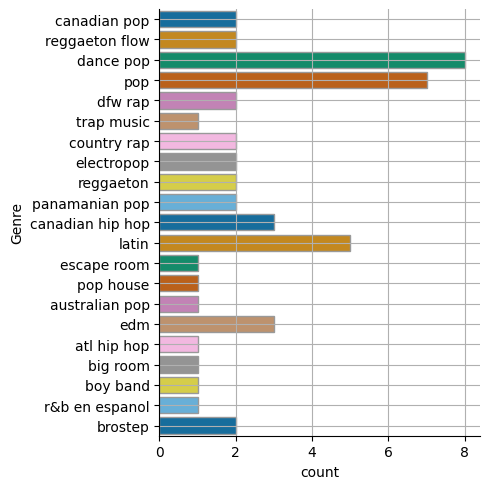

In [8]:
# Top genre list
sns.catplot(data= spoti, y='Genre', kind= 'count', palette='colorblind', edgecolor='.6')
plt.grid('whitegrid')
plt.show()

In [52]:
beats = spoti['Beats.Per.Minute'].sort_values(ascending=False).reset_index().head(5)
popul = spoti['Popularity'].sort_values().reset_index().head(5)
print(f"{beats}\n")
print(f"{popul}\n")

   index  Beats.Per.Minute
0      2               190
1      6               180
2     10               176
3     36               176
4     46               176

   index  Popularity
0     25          70
1     39          78
2      0          79
3     38          80
4     15          82



<Figure size 1200x800 with 0 Axes>

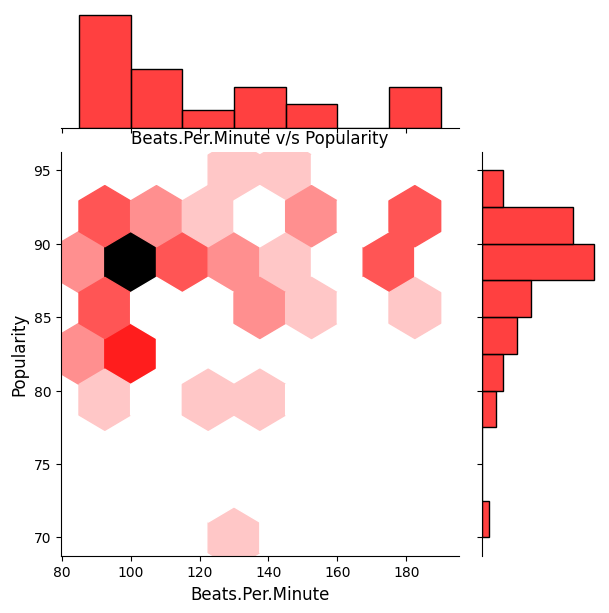

In [9]:
# The reason of this plot to show the connection of beats and popularity
plt.figure(figsize=(12,8))
sns.jointplot(x = spoti['Beats.Per.Minute'].values, y = spoti['Popularity'].values, kind='hex',height=6, ratio=3, color= 'red')
plt.ylabel('Popularity', fontsize=12)
plt.xlabel('Beats.Per.Minute', fontsize=12)
plt.title('Beats.Per.Minute v/s Popularity', fontsize=12)
plt.show()

   index  Loudness..dB..
0     24             -11
1     31             -11
2      9             -11
3     43              -9
4      3              -8


<Figure size 1200x1200 with 0 Axes>

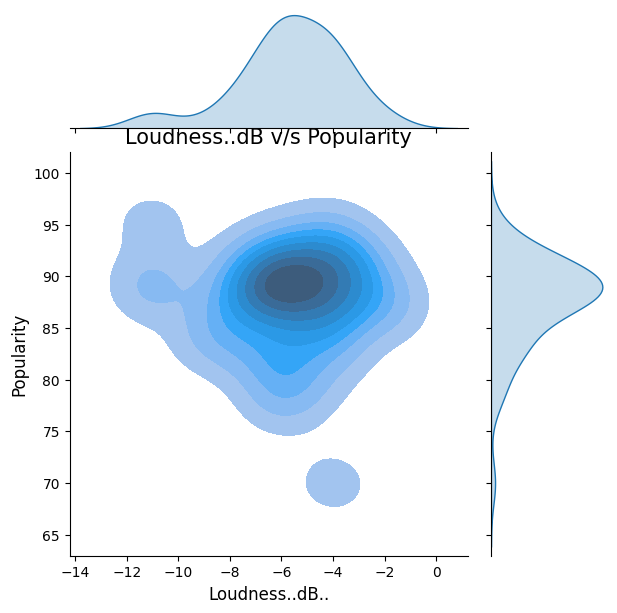

In [56]:
# The reason of this plot to check connection of Loudness and Popularity
loud = spoti['Loudness..dB..'].sort_values(ascending=True).head(5).reset_index()
print(loud)
plt.figure(figsize=(12,12))
sns.jointplot(x= spoti['Loudness..dB..'].values, y= spoti['Popularity'].values, kind='kde', ratio=3, fill=True)
plt.ylabel('Popularity', fontsize=12)
plt.xlabel('Loudness..dB..', fontsize=12)
plt.title('Loudness..dB v/s Popularity', fontsize=15)
plt.show()

In [58]:
spoti.corr().head()

<ipython-input-58-7dcc8ad2e0d0>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Count
Unnamed: 0,1.000000,-0.259193,0.102649,0.122691,0.011914,0.270659,0.137329,-0.065844,-0.015993,-0.257506,-0.160680,NaN
Beats.Per.Minute,-0.259193,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097,NaN
Energy,0.102649,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295,NaN
Danceability,0.122691,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413,NaN
Loudness..dB..,0.011914,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085,NaN


<ipython-input-11-5d2dce2e45c7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spoti.corr(), annot=True, vmax=1, vmin=1,)


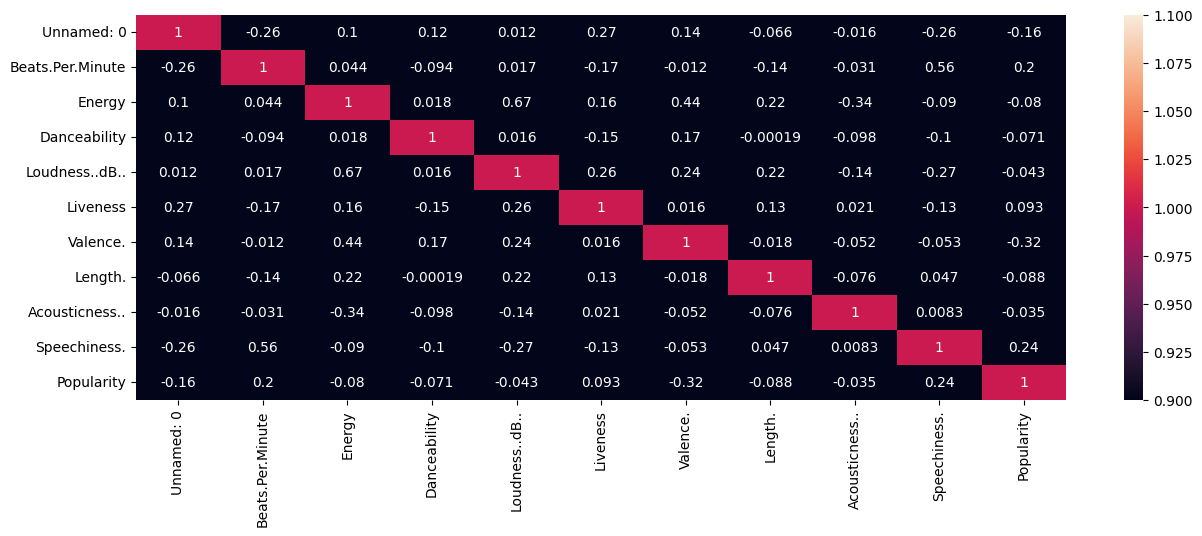

In [11]:
plt.figure(figsize=(15,5))
sns.heatmap(spoti.corr(), annot=True, vmax=1, vmin=1,)
plt.show()

In [66]:
spoti['Artist.Name'].value_counts(ascending=False).head().reset_index()

,index,Artist.Name
0,Ed Sheeran,4
1,Shawn Mendes,2
2,Lil Nas X,2
3,J Balvin,2
4,Sech,2


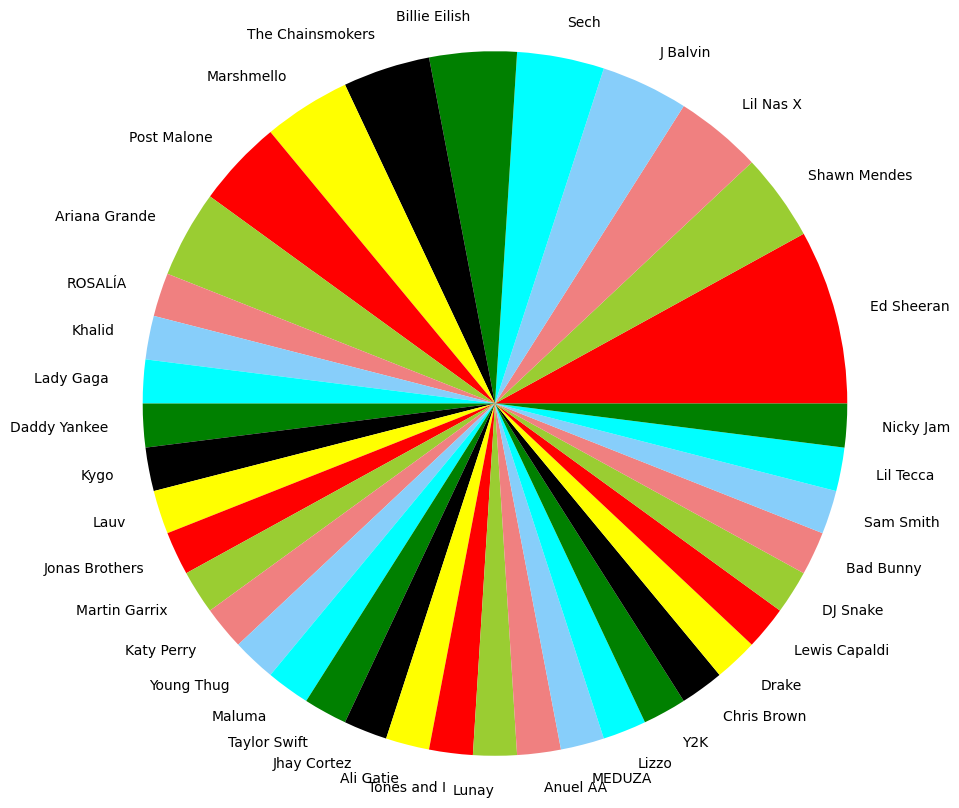

In [21]:
# Pie Chart
label = spoti['Artist.Name'].value_counts().index
sz = spoti['Artist.Name'].value_counts().values
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','cyan', 'green', 'black','yellow']
plt.figure(figsize=(10,10))
plt.pie(sz, labels=label, colors=colors)
autopct=('%0.2f%%')
plt.axis('equal')
plt.show()
# In this chart we can see the most count of song is singer ED Sheeran

In [13]:
# Total Unique Genre
spoti['Genre'].unique()

array(['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap',
       'trap music', 'country rap', 'electropop', 'reggaeton',
       'panamanian pop', 'canadian hip hop', 'latin', 'escape room',
       'pop house', 'australian pop', 'edm', 'atl hip hop', 'big room',
       'boy band', 'r&b en espanol', 'brostep'], dtype=object)

In [14]:
for i in spoti['Genre']:
  if 'pop' in i:
    spoti['Genre'] = spoti['Genre'].replace(i,'pop')
  if 'edm' in i:
    spoti['Genre'] = spoti['Genre'].replace(i,'edm')
  if 'hip hop' in i:
    spoti['Genre'] = spoti['Genre'].replace(i, 'hip hop')
  if 'room' in i:
    spoti['Genre'] = spoti['Genre'].replace(i, 'other')
  if 'r&b' in i:
    spoti['Genre'] = spoti['Genre']  .replace(i, 'other')
  if 'reggae' in i:
    spoti['Genre'] = spoti['Genre'].replace(i, 'reggae')
  if 'rap' in i:
    spoti['Genre'] = spoti['Genre'].replace(i, 'hip hop')
  if 'boyband' in i:
    spoti['Genre'] = spoti['Genre'].replace(i, 'pop')
  if 'brostep' in i:
    spoti['Genre'] = spoti['Genre'].replace(i, 'other')


In [15]:
# After replacing
spoti['Genre'].unique()

array(['pop', 'reggae', 'hip hop', 'latin', 'other', 'edm', 'boy band'],
      dtype=object)

<Axes: >

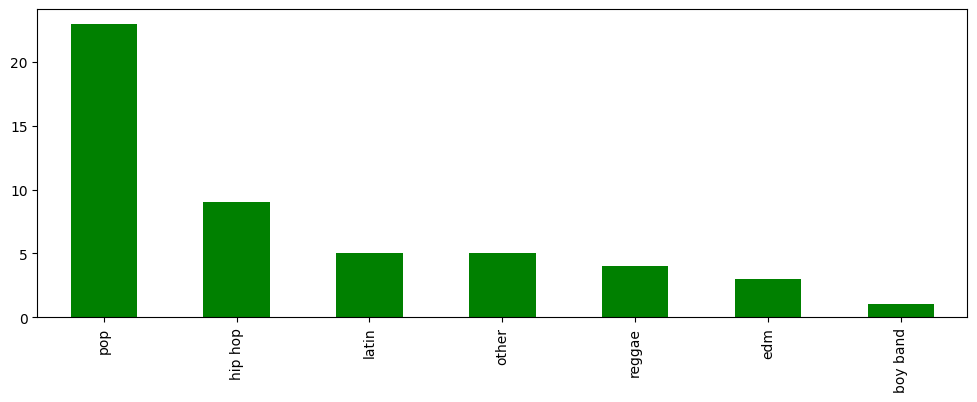

In [16]:
# 7 Most Unique Genre
plt.figure(figsize=(12,4))
spoti['Genre'].value_counts().plot(kind='bar', color='g')

In [17]:
import plotly.express as px

In [18]:
#Top 10 artists
spoti['Count']=1
df_artist=spoti.groupby('Artist.Name')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
df_artist.head(10)

,Artist.Name,Count
9,Ed Sheeran,4
19,Lil Nas X,2
32,Shawn Mendes,2
25,Marshmello,2
28,Post Malone,2
31,Sech,2
10,J Balvin,2
34,The Chainsmokers,2
4,Billie Eilish,2
2,Ariana Grande,2


In [19]:
fig = px.bar(spoti.head(11),x='Artist.Name', y='Popularity',text_auto=True)
fig.update_layout(legend_orientation="h", title="Top 10 Artist")
fig.show()

# The analyzed Spotify dataset, which encapsulates the top 50 tracks, presents a well-organized structure with a notable characteristic - the absence of null or missing values. This enhances the reliability and integrity of the dataset for further analysis.

## The dataset offers a fascinating glimpse into the diversity of musical genres, featuring a range that includes 'pop,' 'reggae,' 'hip hop,' 'latin,' 'other,' 'edm,' and 'boy band.' This diversity underlines the varied taste and preferences of the audience reflected in the top tracks.

## Delving into artist frequencies, Ed Sheeran emerges as the most prominently featured artist, gracing the list a total of four times. Following closely are several artists, including Lil Nas X, Shawn Mendes, Marshmello, Post Malone, Sech, J Balvin, The Chainsmokers, Billie Eilish, and Ariana Grande, each making two appearances in the top 50 tracks. This distribution offers insights into the artists that have captured the attention and appreciation of the audience, evidently influencing the popularity of these tracks.

# In conclusion, this dataset not only provides a snapshot of popular music genres but also sheds light on the artists who have made a notable impact in the realm of music, adding depth to our understanding of contemporary musical trends. Further analysis and exploration can unveil additional valuable insights, making this dataset a rich resource for music enthusiasts and data analysts alike

# *And that's a wrap! My first deep dive into Spotify data - an exciting journey. If I've missed or misinterpreted anything, do share. Your feedback matters as I navigate this new realm. Cheers to your future notebooks! I'm all ears, all eyes. Let's keep the data tales spinning! 🚀🌿*